In [7]:
# ================================
# 🧠 Autoencoder Training Script
# ✅ Add project root to sys.path
# ================================

import os
import sys

# Add parent directory (HarvestGuard/) to Python path
sys.path.append(os.path.abspath(".."))

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from models.autoencoder import ConvAutoencoder


In [9]:
# Cell 2: Set Device (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Using device: {device}")


✅ Using device: cpu


In [10]:
#🧠 Cell 3: Load Reference Images (Cleaned)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),  # Converts to [0, 1]
])

# Load only verified real/reference images
DATA_DIR = "../data/reference"
dataset = datasets.ImageFolder(DATA_DIR, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
print(f"✅ Loaded {len(dataset)} images from {DATA_DIR}")


✅ Loaded 433 images from ../data/reference


In [18]:
# Cell 4: Initialize Model, Loss, Optimizer
model = ConvAutoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

'''
✅ Cell 4: Initialize Model & Loss
Instantiates your convolutional autoencoder model.

Sets the loss function to MSELoss (Mean Squared Error) — it measures how well the model reconstructs the image.

Uses Adam optimizer, a good default for image-based models
'''

'\n✅ Cell 4: Initialize Model & Loss\nInstantiates your convolutional autoencoder model.\n\nSets the loss function to MSELoss (Mean Squared Error) — it measures how well the model reconstructs the image.\n\nUses Adam optimizer, a good default for image-based models\n'

In [17]:
print("Number of parameters:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Number of parameters: 186371


In [12]:
#🧠 Cell 5: Train Model
NUM_EPOCHS = 30
train_losses = []

for epoch in range(NUM_EPOCHS):
    epoch_loss = 0
    model.train()

    for images, _ in dataloader:
        images = images.to(device)

        outputs = model(images)
        loss = criterion(outputs, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(dataloader)
    train_losses.append(avg_loss)

    print(f"📅 Epoch [{epoch+1}/{NUM_EPOCHS}] - Loss: {avg_loss:.5f}")


📅 Epoch [1/30] - Loss: 0.10911
📅 Epoch [2/30] - Loss: 0.06881
📅 Epoch [3/30] - Loss: 0.04877
📅 Epoch [4/30] - Loss: 0.03954
📅 Epoch [5/30] - Loss: 0.03095
📅 Epoch [6/30] - Loss: 0.02522
📅 Epoch [7/30] - Loss: 0.02220
📅 Epoch [8/30] - Loss: 0.02033
📅 Epoch [9/30] - Loss: 0.01903
📅 Epoch [10/30] - Loss: 0.01812
📅 Epoch [11/30] - Loss: 0.01742
📅 Epoch [12/30] - Loss: 0.01666
📅 Epoch [13/30] - Loss: 0.01586
📅 Epoch [14/30] - Loss: 0.01532
📅 Epoch [15/30] - Loss: 0.01437
📅 Epoch [16/30] - Loss: 0.01375
📅 Epoch [17/30] - Loss: 0.01279
📅 Epoch [18/30] - Loss: 0.01180
📅 Epoch [19/30] - Loss: 0.01098
📅 Epoch [20/30] - Loss: 0.01057
📅 Epoch [21/30] - Loss: 0.01019
📅 Epoch [22/30] - Loss: 0.00998
📅 Epoch [23/30] - Loss: 0.00989
📅 Epoch [24/30] - Loss: 0.01019
📅 Epoch [25/30] - Loss: 0.00999
📅 Epoch [26/30] - Loss: 0.00983
📅 Epoch [27/30] - Loss: 0.00961
📅 Epoch [28/30] - Loss: 0.00967
📅 Epoch [29/30] - Loss: 0.00947
📅 Epoch [30/30] - Loss: 0.00926


In [13]:
#🧠 Cell 6: Save the Model
os.makedirs("../models/checkpoints", exist_ok=True)
torch.save(model.state_dict(), "../models/checkpoints/autoencoder.pth")
print("✅ Model weights saved to models/checkpoints/autoencoder.pth")


✅ Model weights saved to models/checkpoints/autoencoder.pth


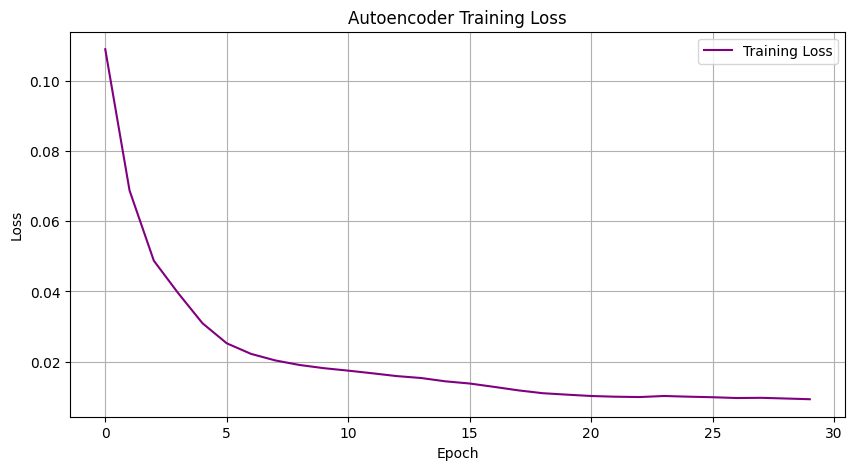

In [14]:
#🧠 Cell 7: Plot Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Training Loss", color="purple")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Autoencoder Training Loss")
plt.legend()
plt.grid(True)
plt.show()
